In [22]:
import torch
import torch.nn as nn
import numpy as np
import time
from function import fun1,fun2,fun3,fun4,fun5,fun6
import os
import matplotlib.pyplot as plt
import ycx_para_config as ycx
from my_NN import *

using_func=ycx.choose_fun

now_real_fun=ycx.choose_real_fun

if_know_kernel=ycx.if_know_real_kernel

# 确保 model 文件夹存在
os.makedirs('./model_parameter', exist_ok=True)

In [23]:
if torch.cuda.is_available():
    device='cuda'
    print('now using cuda !')
else:
    device='cpu'
    print('now using cpu !')
dtype=torch.float32
    
model=ycx.NN().to(device=device,dtype=dtype)
step_len=ycx.choose_seg_step
#load model parameter

now using cuda !


one_value: 0.00041960776 step_value: 0.00041960776


/tmp/ipykernel_2413398/466324719.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  real_value=torch.load(f'./model_value_tensor/{model.name}_real_value.pt')
/tmp/ipykernel

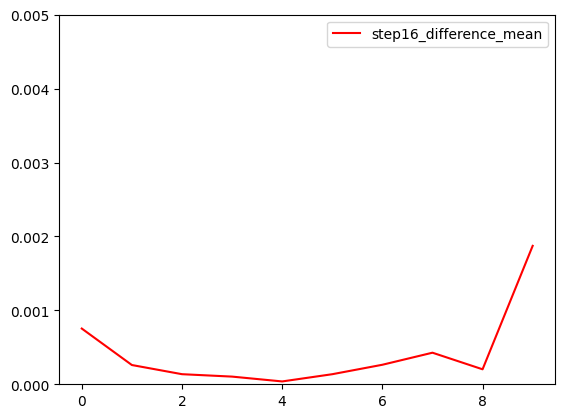

In [28]:
real_value=torch.load(f'./model_value_tensor/{model.name}_real_value.pt')

step_value_1=torch.load(f'./model_value_tensor/{model.name}_step_value_1.pt')
one_value_1=torch.load(f'./model_value_tensor/{model.name}_direct_value_1.pt')

step_value_2=torch.load(f'./model_value_tensor/{model.name}_step_value_2.pt')
one_value_2=torch.load(f'./model_value_tensor/{model.name}_direct_value_2.pt')

step_value_3=torch.load(f'./model_value_tensor/{model.name}_step_value_3.pt')
one_value_3=torch.load(f'./model_value_tensor/{model.name}_direct_value_3.pt')

step_value_4=torch.load(f'./model_value_tensor/{model.name}_step_value_4.pt')
one_value_4=torch.load(f'./model_value_tensor/{model.name}_direct_value_4.pt')

step_value_5=torch.load(f'./model_value_tensor/{model.name}_step_value_5.pt')
one_value_5=torch.load(f'./model_value_tensor/{model.name}_direct_value_5.pt')

step_value_6=torch.load(f'./model_value_tensor/{model.name}_step_value_6.pt')
one_value_6=torch.load(f'./model_value_tensor/{model.name}_direct_value_6.pt')

step_value=(step_value_1+step_value_2+step_value_3+step_value_4+step_value_5+step_value_6)/6
one_value=(one_value_1+one_value_2+one_value_3+one_value_4+one_value_5+one_value_6)/6


if ycx.relative_error:
    difference=torch.abs((one_value-real_value)/real_value)
    step_difference=torch.abs((step_value-real_value)/real_value)
else:
    difference=torch.abs((one_value-real_value))
    step_difference=torch.abs((step_value-real_value))
    
dif=difference.detach().cpu().numpy()
dif_step=step_difference.detach().cpu().numpy()
print('one_value:',np.mean(dif),'step_value:',np.mean(dif_step))

dif_mean=np.zeros(10)
for i in range(10):
    dif_mean[i]=np.mean(dif[i*10:(i+1)*10])
    
dif_step_mean=np.zeros(10)
for i in range(10):
    dif_step_mean[i]=np.mean(dif_step[i*10:(i+1)*10])
    
#plt.plot(dif_mean,c='b',label='one_step_difference_mean')
plt.plot(dif_step_mean,c='r',label=f'step{step_len}_difference_mean')
plt.ylim(ycx.ylim)
plt.legend()
plt.show()